<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Intro_to_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to stastics
* Statistics can be divided into 2 branches
  * **Descriptive statistics** Describe and sumarize data
  * **Inferential statistics** Infer about a larger population from a sample
* Data is of 2 types
  * **Numerical** This is quantitive data measured in numbers. Can be discrete or continous
  * **Categorical**  Categorical data is data organized in categories. Can further be nominal(unordered) or ordinal(ordered)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Measures of center
1. **Mean** Most common way to measure center of data. Sum()/count(n). Use np.mean(). Suspetible to outliers

2. **Median** Represents the middle value. Sort the data points and find the middle value. Not as susceptible to outliers. Use np.median()

3. **Mode** Is the most frequent value. You can use the statstics module to find mode. statistics.mode()

For symmetrical data mean is a better measure of centre, for skewed data median is a better measure of center. 

### Measures of spread
* **Variance** Measures the average distance of each data point from the data's mean. Calculate the distance between each point and the mean. Square it and then divide by the number of data points -1. Higher variance higher the spread. for samples use np.var(data,ddof=1). Units are squared

* **Standard Deviation** The standard deviation is the sqrt of the variance. Easier to use and interpret.

* **Mean Absolute  Deviation** Average of the absolute value of the distances from the mean. Std deviation penalizes larger differences from mean more

* **Quantiles** Split the data into x equal parts. use np.quantile(data,0.5). This is another way to get median. np.quantile(data,[0.05,0.25,0.50,0.75])
This can give you a list of the quantiles in your data
np.quantile(data,np.linspace(0,1,5)). This will give you 5 quantiles

* **outliers** 
  * Any data<q1-1.5*IQR is a low outlier
  * Any data>Q3+1.5*IQR
  


In [2]:
food_cons=pd.read_csv('https://assets.datacamp.com/production/repositories/5786/datasets/49f6356966016c70a9f63a0474942675377bdcf2/food_consumption.csv')

In [3]:
food_cons.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [4]:
## Getting mean statistics for only belgium and USA
be_food_cons=food_cons.loc[food_cons.country=='Belgium']
us_food_cons=food_cons.loc[food_cons.country=='USA']
print('Belgium avg food consumption is',np.mean(be_food_cons.consumption))
print('USA avg food consumption is',np.mean(us_food_cons.consumption))

Belgium avg food consumption is 42.13272727272727
USA avg food consumption is 44.650000000000006


In [5]:
# Getting summary statistics for US and Belgium food consumption
print(be_food_cons.describe().transpose())
print(us_food_cons.describe().transpose())

              count        mean         std     min      25%     50%      75%  \
Unnamed: 0     11.0  402.000000    3.316625  397.00  399.500  402.00  404.500   
consumption    11.0   42.132727   71.636248    0.07    7.965   12.59   28.810   
co2_emission   11.0  100.190000  160.688878    0.03   12.265   21.34   91.515   

                 max  
Unnamed: 0    407.00  
consumption   236.19  
co2_emission  482.31  
              count    mean         std    min    25%    50%     75%      max
Unnamed: 0     11.0   61.00    3.316625  56.00  58.50  61.00  63.500    66.00
consumption    11.0   44.65   73.796233   0.04   7.37  14.58  43.125   254.69
co2_emission   11.0  156.26  335.760414   0.02  13.65  15.34  75.775  1118.29


In [6]:
## Getting the food consumption and emissions by country
by_country=food_cons.groupby('country')[['consumption','co2_emission']].sum()

In [7]:
## Creating bootstrap replicates using the sample method
rep=np.empty(10000)
for i in range(0,10000):
  sample=by_country.sample(len(by_country.index),replace=True)
  stat=np.corrcoef(sample.consumption,sample.co2_emission)[0,1]
  rep[i]=stat

In [8]:
## Calculate the 95% CI for the correlation. Looks like strong correlation between consumption and emissions.
np.quantile(rep,[0.05,0.95])

array([0.75303181, 0.84378166])

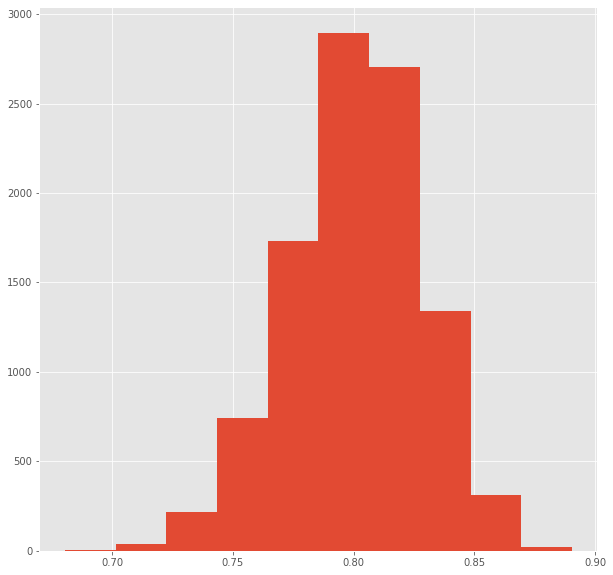

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.hist(rep)
plt.show()

In [10]:
## Writing a list comprehension
cons_2=["small" if c<=100  else "big" for c in by_country.consumption]

In [11]:
cons_3=[c for c in by_country.consumption if c>=200]

In [12]:
len(cons_3)

101

## Discrete Distributions
* Any random variable that has discrete values has a discrete distribution.
eg. Number of packages (always integer discrete), dice outcomes (always discrete)
* Expected value= (value1* probablility1)+(value2* probaility2).....
* Discrete uniform and discrete non uniform
* *Law of large numbers* Asd the sample size increases the sample mean will approach the theoretical mean.



In [13]:
food_cons.loc[food_cons.consumption>=100,:]

,Unnamed: 0,country,food_category,consumption,co2_emission
6,7,Argentina,dairy,195.08,277.87
7,8,Argentina,wheat,103.11,19.66
17,18,Australia,dairy,234.49,334.01
28,29,Albania,dairy,303.72,432.62
29,30,Albania,wheat,138.64,26.44
...,...,...,...,...,...
1372,1373,Cambodia,rice,159.10,203.60
1383,1384,Sierra Leone,rice,103.30,132.19
1394,1395,Sri Lanka,rice,109.72,140.41
1405,1406,Indonesia,rice,134.62,172.27


In [14]:
from scipy.stats import uniform
# Probability of waiting less than 7 minutes
uniform.cdf(7,0,12)
# Probability of waiting more than 7 minutes
1-uniform.cdf(7,0,12)
# Probility of waiting between 4 and 7 minutes
uniform.cdf(7,0,12)-uniform.cdf(4,0,12)

0.25000000000000006

In [15]:
#Generating a random sample
uniform.rvs(0,5,size=10)

array([0.55911221, 0.79433899, 1.17097981, 3.72770342, 1.75864936,
       4.19790788, 4.06891752, 0.0148865 , 2.36764424, 2.49101378])

### Binomial distribution
* Any process that has 2 possible outcomes can be represented by a binomial distribution
* Each trial has to be independent
* expected value=n*p

In [16]:
from scipy.stats import binom

In [17]:
# generating a binomial distribution
binom.rvs(1,0.5,size=100)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [18]:
# probability of getting an outcome (n_succes,no of trials,p(s))
binom.pmf(7,20,0.5)

0.07392883300781249

In [19]:
# Probability of 7 or fewer heads in 10 trials
binom.cdf(7,20,0.5)

0.13158798217773438

## Normal distribution
Key characteristics
* Its a symmetrical distribution
* The area benaeath the curve is 1 
* The curve never hits zero but approaches it (asymptotic)
* Described by mean and std deviation
* Mean 0 and std deviation 1 is the standard Normal distribution


In [20]:
# Getting probability
from scipy.stats import norm
norm.cdf(154,161,7)

0.15865525393145707

In [21]:
# Getting percentile
norm.ppf(0.9,161,7)

169.9708609588122

In [22]:
#Generating a random sample
norm.rvs(161,7,size=20)

array([156.29710058, 169.6415675 , 154.95091094, 155.2304913 ,
       162.28846252, 147.35291967, 152.16696416, 156.07944207,
       159.98964823, 157.32628208, 160.56533879, 175.17941502,
       155.01930752, 162.17739522, 174.49760583, 148.42616961,
       160.02689792, 161.64787339, 152.17293637, 167.92128849])

In [23]:
import numpy as np
np.random.normal(151,7,10)

array([157.41230198, 152.86802607, 154.77168167, 131.84405734,
       157.40276349, 152.65331422, 154.86015332, 155.57793207,
       158.37167775, 161.41242343])

### Central Limit Theorem and sampling distribution
* A distribution of a summary statistic is called a sample distribution
* A sampling distribution approaches the normal distribution as the number of simulations/trials increases

In [24]:
## Creating bootstrap replicates using the sample method
rep=np.empty(10000)
for i in range(0,10000):
  sample=by_country.sample(len(by_country.index),replace=True)
  stat=np.corrcoef(sample.consumption,sample.co2_emission)[0,1]
  rep[i]=stat

### Poisson distribution
* Events appear to happen at a certain rate but completely at random
* Animals adopted at shelter per week
* Number of people arriving at a restaurant per hour.
* Described by a value lambda which is the average number of events in a time period.
* Its a discrete distribution. so it has a pmf that can tell us the probability of exactly x events/time period. Use CDF for less than x

In [25]:
# Generating samples
from scipy.stats import poisson
poisson.rvs(8,size=10)

array([ 4,  8, 11,  7, 13, 13, 10,  9,  7, 12])

## Exponential distribution
* Models certain time passing between poisson events
* Used for wait times
* The expected value of exponential distribution =1/lambda
* Wait time is continous so this is a continous distribution

In [26]:
from scipy.stats import expon
expon.cdf(1,scale=0.5)

0.8646647167633873

In [27]:
1-expon.cdf(3,scale=0.5)

0.0024787521766663767

## Correlation
* Can be visualized by a scatter plot
* x axis is the independent and y is the dependent axis
* correlation coeffecient a number between -1 to +1 defines the relationship between 2 variables.
* Close to 0 correlation coeffecient means the linear relationship does not exist
* Correlation does not measure non linear relationships
* Highly skewed x variables might have a log linear relationship with the y variable
* Some statistical methods like regression require variables to have a linear relation ship. Its also possible that after a transformation the variables are linearly related
* Beware of confounding and spurious correlations. Correlation is not causation only association

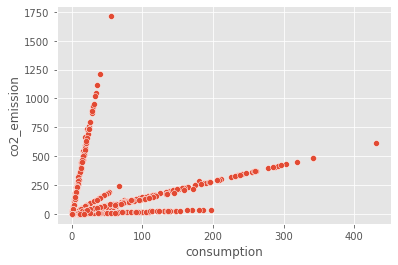

In [28]:
import seaborn as sns
sns.scatterplot(x='consumption',y='co2_emission',data=food_cons)

In [29]:
food_cons['consumption'].corr(food_cons['co2_emission'])

0.334250704433365

In [30]:
food_cons.country.value_counts()

Argentina     11
Zimbabwe      11
Belize        11
Namibia       11
Jamaica       11
              ..
Russia        11
Germany       11
Belgium       11
Venezuela     11
Bangladesh    11
Name: country, Length: 130, dtype: int64

## Design of studies
* Test and control groups should be comparable other than the difference between the attribute being measured or tested for
* some techniques to avoid bias and confounding
  * Randomized Control trial
  * Use placebo so that participants knowledge of taking a drug/treatment does not affect the outcome
  * Double Blind experiment meaans that even the test administrator does not know who is getting the placebo or the drug
* **Longitudnal Study** same participants over time
* **Cross sectional study** Many participants as a snapshot in time